<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/covid_19_fwd_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

if you want to run the belo with the real data, go here: https://www.kaggle.com/pastrop/covid-19-fwd-modelling

# **Comparative Analysis of the Hubei, Italy, NY State,Spain and Russia Data**<br>
Statement of the problem: Both "confirmed" and "death" curves exhibit very high level variability although Italian pattern for the infection rate is becoming prevalent.  In my opinion only China and Italy have enough data to for any model training.  The below notebook consists of 2 parts:
1. Comparative Analysis of the Infection spread in Hubei China, Italy, New York State, Spain and Russia.  Russia is included in the mix because it seems to show the confirmed cases growth rate that exceeds Italy at the same stage.  
2. Sandbox: An attempt to fit a linear regression prediction model.  The idea: Predict a number of cases on day N as a function of a number of cases over 9 previous days assuming that the infected person spreads virus for 9 days before the transmission is arrested by testing, hospitalization, etc., I trained 2 predictors using Hubei and Italy data. This a just an experiment.  Interestingly, the aproach is surprisingly acurate for short term predictions.  This is not completely unexpected, there is an bvious dependency between infection level today from the infection level over in the past yet, the model trained on data from Italy and China works very well for all other geographies<br><br>
**Findings as of April 4th (NY State, Spain, Russia) for the Confirmed Cases:**<br><br>
NY State Confirmed Cases Curve is in btw Italy's and Hubei scenarios.  It seems to accelerate getting very close to Italy<br>  
Russia Confirmed Cases growth rate exceeds Italy<br>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import warnings
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import math
from sklearn import linear_model

import copy

import datetime
from dateutil.parser import parse

In [ ]:
#read file & check the upload
df = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
#df.tail(40)

In [ ]:
#read file & check the upload US Only
df_us = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv')
#df_us.head(50)

# US Metro Areas

In [ ]:
cols = [0,1,2,3,4,5,6,7,8,9,10]
df_nyc = df_us.loc[df_us['Admin2'] =='New York'].drop(df_us.columns[cols],axis=1)
df_la = df_us.loc[df_us['Admin2'] =='Los Angeles'].drop(df_us.columns[cols],axis=1)
df_houston = df_us.loc[(df_us['Admin2'] =='Harris') & (df_us['Province_State']=='Texas')].drop(df_us.columns[cols],axis=1)
df_chicago = df_us.loc[(df_us['Admin2'] =='Cook') & (df_us['Province_State']=='Illinois')].drop(df_us.columns[cols],axis=1)
df_phoenix = df_us.loc[df_us['Admin2'] =='Maricopa'].drop(df_us.columns[cols],axis=1) 
df_philly = df_us.loc[df_us['Admin2'] =='Philadelphia'].drop(df_us.columns[cols],axis=1)
df_sanant = df_us.loc[(df_us['Admin2'] =='Bexar') & (df_us['Province_State']=='Texas')].drop(df_us.columns[cols],axis=1)
df_dallas = df_us.loc[(df_us['Admin2'] =='Dallas') & (df_us['Province_State']=='Texas')].drop(df_us.columns[cols],axis=1)
df_sanjose = df_us.loc[(df_us['Admin2'] =='Santa Clara') & (df_us['Province_State']=='California')].drop(df_us.columns[cols],axis=1)
df_sandiego = df_us.loc[(df_us['Admin2'] =='San Diego') & (df_us['Province_State']=='California')].drop(df_us.columns[cols],axis=1)

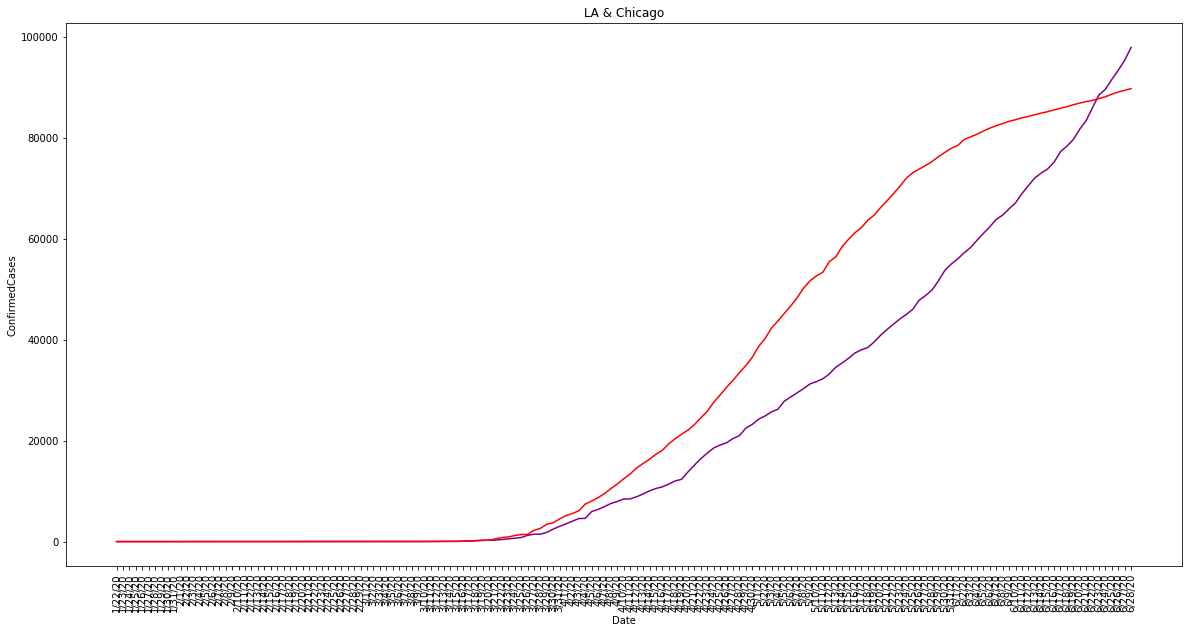

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) 
ax.plot(list(df_la),
        list(df_la.values.flatten()),
          color='purple')

ax.plot(list(df_la),
        list(df_chicago.values.flatten()),
          color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="LA & Chicago")
plt.xticks(rotation=90)
#plt.legend(loc='upper left')
plt.show()

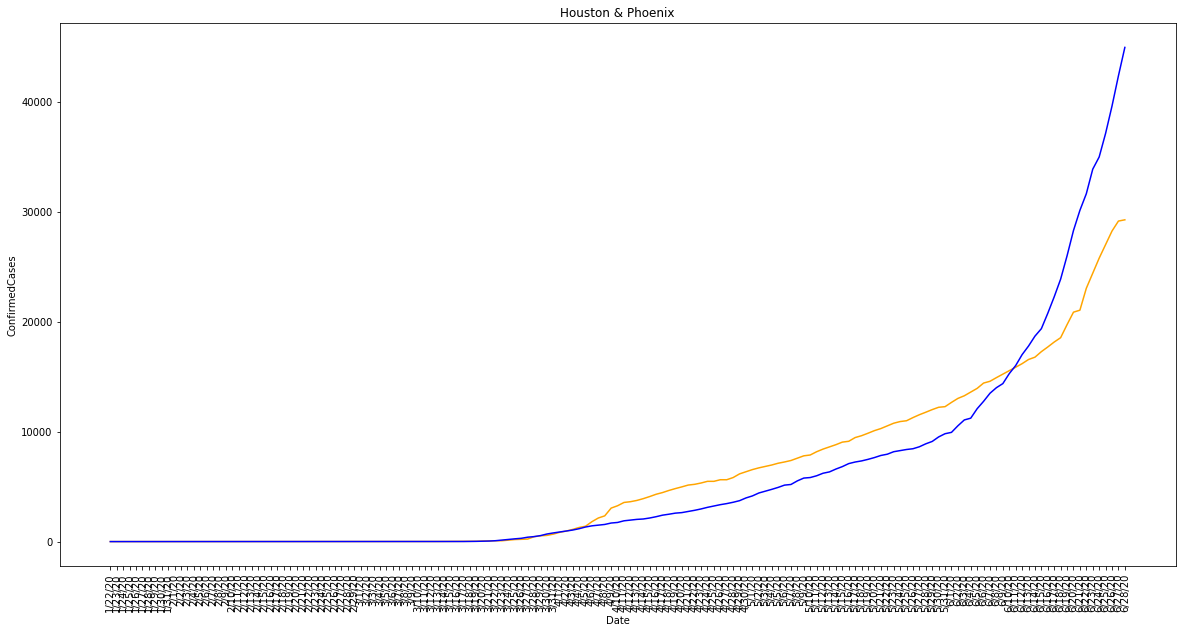

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) 

ax.plot(list(df_la),
        list(df_houston.values.flatten()),
          color='orange')

ax.plot(list(df_la),
        list(df_phoenix.values.flatten()),
          color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Houston & Phoenix")
plt.xticks(rotation=90)
#plt.legend(loc='upper left')
plt.show()

In [ ]:
NYC_norm = [item//26 for item in list(df_nyc.values.flatten())]
LA_norm = [round(item/7.5) for item in list(df_la.values.flatten())]
Houston_norm = [round(item/3.6) for item in list(df_houston.values.flatten())]
Chicago_norm = [item//12 for item in list(df_chicago.values.flatten())]
Phoenix_norm = [round(item/1.55) for item in list(df_phoenix.values.flatten())]
Philly_norm = [round(item/4.9) for item in list(df_philly.values.flatten())]
Sanant_norm = [round(item/3.2) for item in list(df_sanant.values.flatten())]
Dallas_norm = [round(item/3.65) for item in list(df_dallas.values.flatten())]
Sanjose_norm = [round(item/1.3) for item in list(df_sanjose.values.flatten())]
Sandiego_norm = [round(item/0.8) for item in list(df_sandiego.values.flatten())]

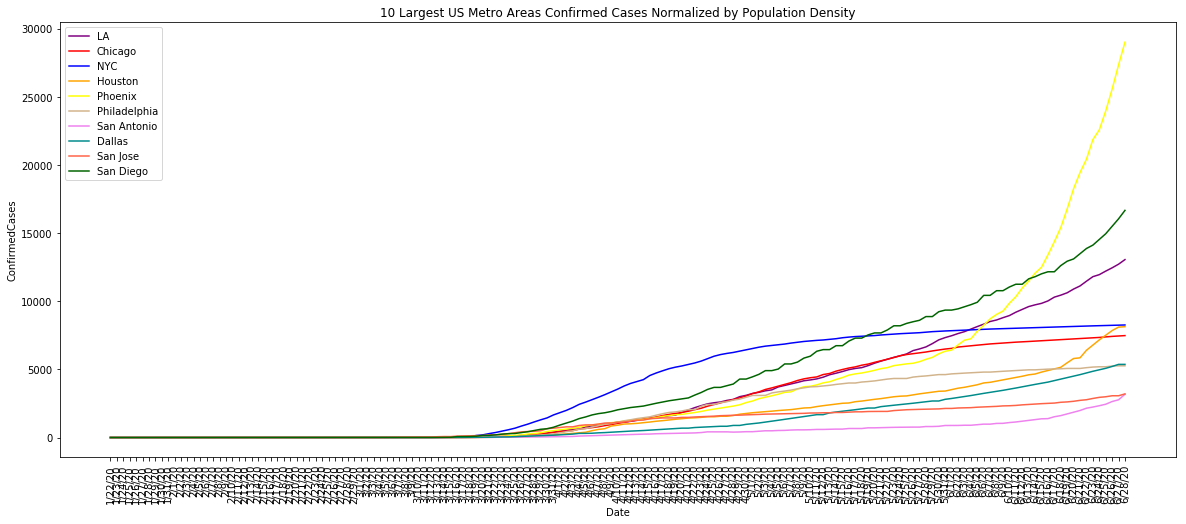

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8)) 
ax.plot(list(df_la),
        LA_norm, label = 'LA',
          color='purple')

ax.plot(list(df_la),
        Chicago_norm, label = 'Chicago',
          color='red')

ax.plot(list(df_la),
        NYC_norm, label = 'NYC',
          color='blue')

ax.plot(list(df_la),
        Houston_norm, label = 'Houston',
          color='orange')

ax.plot(list(df_la),
        Phoenix_norm, label = 'Phoenix',
          color='yellow')

ax.plot(list(df_la),
        Philly_norm, label = 'Philadelphia',
          color='tan')

ax.plot(list(df_la),
        Sanant_norm, label = 'San Antonio',
          color='violet')

ax.plot(list(df_la),
       Dallas_norm, label = 'Dallas',
          color='darkcyan')

ax.plot(list(df_la),
       Sanjose_norm, label = 'San Jose',
          color='tomato')

ax.plot(list(df_la),
       Sandiego_norm, label = 'San Diego',
          color='darkgreen')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="10 Largest US Metro Areas Confirmed Cases Normalized by Population Density")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

Hubei Province Confirmed Cases. I am using Hubei is one of the benchmarks (the other being Italy) bcs they have the most data for analysis while experience a high number of cases.  Only South Korea and Japan has about the same amount of the data yet those countries are, unfortunately for the rest of the world, exceptions to the current rule

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) 
# Add x-axis and y-axis

ax.plot(df.loc[df['Province/State'] == 'Hubei', 'ObservationDate'],
          df.loc[df['Province/State'] == 'Hubei', 'Confirmed'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Hubei Only")
plt.xticks(rotation=90)
#plt.legend(loc='upper left')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) 
# Add x-axis and y-axis

ax.plot(df.loc[df['Province/State'] == 'District of Columbia', 'ObservationDate'],
          df.loc[df['Province/State'] == 'District of Columbia', 'Confirmed'],label = 'District of Columbia - Confirmed',
          color='green')

ax.plot(df.loc[df['Province/State'] == 'District of Columbia', 'ObservationDate'],
          df.loc[df['Province/State'] == 'District of Columbia', 'Deaths'],label = 'District of Columbia - Deaths',
          color='black')


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases & Deaths",
       title="DC")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

# Infection Rate Analysis<br>
A bunch of chart for the Infection Daily rates for Confirmed and Lethal cases.I considered both daily rates and normalized daily rates.  Both are interesting yet the I believe that daily rates are more useful

*Italy*

In [ ]:
frame_Italy = {'ObservationDate': df.loc[df['Country/Region'] == 'Italy', 'ObservationDate'],
         'Confirmed':df.loc[df['Country/Region'] == 'Italy', 'Confirmed'],
         'Deaths':df.loc[df['Country/Region'] == 'Italy', 'Deaths']}
frame_Italy = pd.DataFrame(frame_Italy)
frame_Italy_grouped_confirmed = frame_Italy.groupby(['ObservationDate'])['Confirmed'].sum()
frame_Italy_grouped_death = frame_Italy.groupby(['ObservationDate'])['Deaths'].sum()

In [ ]:
plot_Italy = []
rate_Italy = frame_Italy_grouped_confirmed.values
for item in zip(rate_Italy[::],rate_Italy[1:]):
    plot_Italy.append((item[1]-item[0]))
plt.plot(plot_Italy)
plt.title('Infection Rate')

In [ ]:
plot_Italy = []
rate_Italy = frame_Italy_grouped_death.values
for item in zip(rate_Italy[::],rate_Italy[1:]):
    plot_Italy.append((item[1]-item[0]))
plt.plot(plot_Italy)
plt.title('Death Rate')

In [ ]:
frame_NY = {'ObservationDate': df.loc[df['Province/State'] == 'New York', 'ObservationDate'],
         'Confirmed':df.loc[df['Province/State'] == 'New York', 'Confirmed'],
         'Deaths':df.loc[df['Province/State'] == 'New York', 'Deaths']}
frame_NY = pd.DataFrame(frame_NY)
frame_NY_grouped_confirmed = frame_NY.groupby(['ObservationDate'])['Confirmed'].sum()
frame_NY_grouped_death = frame_NY.groupby(['ObservationDate'])['Deaths'].sum()

In [ ]:
plot_NY = []
plot_NY_conf = []
rate_NY = frame_NY_grouped_confirmed.values
#print(rate_NY)
plot_NY = [round(sum(rate_NY[i:i+3]/3)) for i in range(len(rate_NY)-3)]
x_pos = np.arange(len(plot_NY))
plt.title('Infection Rate-NY - 3 days average')
plt.bar(x_pos,plot_NY, align='center')

In [ ]:
plot_NY = []
plot_NY_conf = []
rate_NY = frame_NY_grouped_confirmed.values
for item in zip(rate_NY[::],rate_NY[1:]):
    plot_NY.append((item[1]-item[0]))   
print(plot_NY)
plt.plot(list(frame_NY['ObservationDate'])[31:],plot_NY[30:])
plt.xticks(rotation='vertical')
plt.title('Infection Rate-NY-Daily')

In [ ]:
plot_NY = []
rate_NY = frame_NY_grouped_death.values
rate_NY_filtered = list(filter(lambda x: x != 0, rate_NY))        
for item in zip(rate_NY_filtered[::],rate_NY_filtered[1:]):
    plot_NY.append((item[1]-item[0]))
plt.plot(plot_NY)
plt.title('Death Rate')

In [ ]:
plot_NY = []
rate_NY = frame_NY_grouped_death.values
rate_NY_filtered = list(filter(lambda x: x != 0, rate_NY))        
for item in zip(rate_NY_filtered[::],rate_NY_filtered[1:]):
    plot_NY.append((item[1]-item[0])/item[0])
plt.plot(plot_NY)
plt.title('Normalized Death Rate')

In [ ]:
frame_Hubei = {'ObservationDate': df.loc[df['Province/State'] == 'Hubei', 'ObservationDate'],
         'Confirmed':df.loc[df['Province/State'] == 'Hubei', 'Confirmed'],
         'Deaths':df.loc[df['Province/State'] == 'Hubei', 'Deaths']}
frame_Hubei = pd.DataFrame(frame_Hubei)
frame_Hubei_grouped_confirmed = frame_Hubei.groupby(['ObservationDate'])['Confirmed'].sum()
frame_Hubei_grouped_death = frame_Hubei.groupby(['ObservationDate'])['Deaths'].sum()

In [ ]:
plot_Hubei = []
rate_Hubei = frame_Hubei_grouped_confirmed.values
for item in zip(rate_Hubei[::],rate_Hubei[1:]):
    plot_Hubei.append((item[1]-item[0])) 
plt.plot(plot_Hubei)
plt.title('Infection Rate-Hubei')

In [ ]:
plot_Hubei = []
rate_Hubei = frame_Hubei_grouped_confirmed.values
for item in zip(rate_Hubei[::],rate_Hubei[1:]):
    plot_Hubei.append((item[1]-item[0])/item[0])   
plot_Hubei_conf = copy.deepcopy(plot_Hubei)
print(plot_Hubei[:40])
count = 0
for item in reversed(plot_Hubei[:40]):
    if item>0.1:
        break
    count += 1
print(count)
plt.plot(plot_Hubei)
plt.title('Normalized Infection Rate')

In [ ]:
plot_Hubei = []
rate_Hubei = frame_Hubei_grouped_death.values
for item in zip(rate_Hubei[::],rate_Hubei[1:]):
    plot_Hubei.append((item[1]-item[0]))   
plt.plot(plot_Hubei)
plt.title('Death Rate')

In [ ]:
plot_Hubei = []
rate_Hubei = frame_Hubei_grouped_death.values
for item in zip(rate_Hubei[::],rate_Hubei[1:]):
    plot_Hubei.append((item[1]-item[0])/item[0])   
plt.plot(plot_Hubei)
plt.title('Normalized Death Rate')

In [ ]:
frame_DC = {'ObservationDate': df.loc[df['Province/State'] == 'District of Columbia', 'ObservationDate'],
         'Confirmed':df.loc[df['Province/State'] == 'District of Columbia', 'Confirmed'],
         'Deaths':df.loc[df['Province/State'] == 'District of Columbia', 'Deaths']}
frame_DC = pd.DataFrame(frame_DC)
frame_DC_grouped_confirmed = frame_DC.groupby(['ObservationDate'])['Confirmed'].sum()
frame_DC_grouped_death = frame_DC.groupby(['ObservationDate'])['Deaths'].sum()

In [ ]:
plot_DC = []
rate_DC = frame_DC_grouped_confirmed.values
for item in zip(rate_DC[::],rate_DC[1:]):
    plot_DC.append((item[1]-item[0]))   
plot_DC_conf = copy.deepcopy(plot_DC)
plt.plot(plot_DC)
plt.title('Infection Rate')

In [ ]:
frame_Russia = {'ObservationDate': df.loc[df['Country/Region'] == 'Russia', 'ObservationDate'],
         'Confirmed':df.loc[df['Country/Region'] == 'Russia', 'Confirmed'],
         'Deaths':df.loc[df['Country/Region'] == 'Russia', 'Deaths']}
frame_Russia = pd.DataFrame(frame_Russia)
frame_Russia_grouped_confirmed = frame_Russia.groupby(['ObservationDate'])['Confirmed'].sum()
frame_Russia_grouped_death = frame_Russia.groupby(['ObservationDate'])['Deaths'].sum()
#frame_Russia.tail(5)

In [ ]:
plot_Russia = []
frame_Russia_grouped = frame_Russia.groupby(['ObservationDate'])['Confirmed'].sum()
rate_Russia = frame_Russia_grouped.values
rate_Russia_filtered = list(filter(lambda x: x != 0, rate_Russia))        
#print(rate_Russia_filtered)
for item in zip(rate_Russia_filtered[::],rate_Russia_filtered[1:]):
    plot_Russia.append((item[1]-item[0]))
plt.plot(plot_Russia)
plt.title('Infection Rate')

In [ ]:
plot_Russia = []
frame_Russia_grouped = frame_Russia.groupby(['ObservationDate'])['Confirmed'].sum()
rate_Russia = frame_Russia_grouped.values
rate_Russia_filtered = list(filter(lambda x: x != 0, rate_Russia))        
#print(rate_Russia_filtered)
for item in zip(rate_Russia_filtered[::],rate_Russia_filtered[1:]):
    tmp = (item[1]-item[0])/item[0]
    if tmp >=0:
        plot_Russia.append((item[1]-item[0])/item[0])
    else:
        plot_Russia.append(0)
plot_Russia_conf = copy.deepcopy(plot_Russia)
plt.plot(plot_Russia)
plt.title('Normalized Infection Rate')

**Spain**

In [ ]:
frame_Spain = {'ObservationDate': df.loc[df['Country/Region'] == 'Spain', 'ObservationDate'],
         'Confirmed':df.loc[df['Country/Region'] == 'Spain', 'Confirmed'],
         'Deaths':df.loc[df['Country/Region'] == 'Spain', 'Deaths']}
frame_Spain = pd.DataFrame(frame_Spain)
frame_Spain_grouped_confirmed = frame_Spain.groupby(['ObservationDate'])['Confirmed'].sum()
frame_Spain_grouped_death = frame_Spain.groupby(['ObservationDate'])['Deaths'].sum()

In [ ]:
rate_Spain = frame_Spain_grouped_confirmed.values
rate_Spain_filtered = list(filter(lambda x: x != 0, rate_Spain)) 
print(rate_Spain_filtered)

In [ ]:
plot_Spain = []
#print(list(zip(rate_Spain_filtered[::],rate_Spain_filtered[1:])))
for item in zip(rate_Spain_filtered[::],rate_Spain_filtered[1:]):
    plot_Spain.append((item[1]-item[0]))
plot_Spain_conf = copy.deepcopy(plot_Spain)
print(plot_Spain)
count = 0
for item in reversed(plot_Spain):
    if item>0.1:
        break
    count += 1
print(count)
plt.plot(plot_Spain)
plt.title('Infection Rate')

In [ ]:
rate_Spain_d = frame_Spain_grouped_death.values
rate_Spain_filtered_d = list(filter(lambda x: x != 0, rate_Spain_d)) 
#print(rate_Spain_filtered_d)

In [ ]:
plot_Spain_d = []
#print(list(zip(rate_Spain_filtered_d[::],rate_Spain_filtered_d[1:])))
for item in zip(rate_Spain_filtered_d[::],rate_Spain_filtered_d[1:]):
    plot_Spain_d.append((item[1]-item[0])/item[0])
#print(plot_Spain_d)
plt.plot(plot_Spain_d)
plt.title('Normalised Death Rate')

In [ ]:
frame_France = {'ObservationDate': df.loc[df['Country/Region'] == 'France', 'ObservationDate'],
         'Confirmed':df.loc[df['Country/Region'] == 'France', 'Confirmed'],
         'Deaths':df.loc[df['Country/Region'] == 'France', 'Deaths']}
frame_France = pd.DataFrame(frame_France)
frame_France_grouped_confirmed = frame_France.groupby(['ObservationDate'])['Confirmed'].sum()
frame_France_grouped_death = frame_France.groupby(['ObservationDate'])['Deaths'].sum()

In [ ]:
rate_France = frame_France_grouped_confirmed.values
rate_France_filtered = list(filter(lambda x: x != 0, rate_France)) 
print(rate_France_filtered)

# Sandbox

# Model Training on the Hubey Data

In [ ]:
Hubei_conf = df.loc[df['Province/State'] == 'Hubei', 'Confirmed']
hubei_data = list(Hubei_conf.values)
print(len(hubei_data))

In [ ]:
temp = []
j=0
for i in range(0,len(hubei_data),10):
    if i > 0:
        tmp = hubei_data[j:i]
        temp.append(tmp)
        j = i
df_regr = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr

In [ ]:
x=pd.DataFrame(df_regr.iloc[:,:-1]) #features
y=pd.DataFrame(df_regr.iloc[:,-1]) # projected variable

In [ ]:
#fitting linear regression
from sklearn import linear_model
predictor_hb = linear_model.LinearRegression()

In [ ]:
Predictor_Hubei=predictor_hb.fit(x,y)

In [ ]:
v=pd.DataFrame(Predictor_Hubei.coef_,index = ['Co-efficient']).transpose()
w = pd.DataFrame(x.columns, columns = ['Attribute'])

In [ ]:
coeff_df = pd.concat([v,w],axis=1,join='inner'); coeff_df

**Projections using Hubei Model**

**New York State**

In [ ]:
NY_conf = df.loc[df['Province/State'] == 'New York', 'Confirmed']
NY_data = list(NY_conf.values);
print(len(NY_data))

In [ ]:
temp = []
j=0
for i in range(len(NY_data)-9):
    tmp = NY_data[i:i+10]
    temp.append(tmp)

df_regr_NY = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr_NY

In [ ]:
dim = df_regr_NY.shape[0]
x_dates_ny = list(df.loc[df['Province/State'] == 'New York', 'ObservationDate'])[-dim:]

In [ ]:
x_NY = pd.DataFrame(df_regr_NY.iloc[:,:-1]) #features
y_NY = pd.DataFrame(df_regr_NY.iloc[:,-1]) # ground truth
y_predicted_hubei_NY = Predictor_Hubei.predict(x_NY).flatten()

In [ ]:
#plotting
n_points = df_regr_NY.shape[0]
x = np.arange(n_points)
y_NY_ground_truth = y_NY.values
plt.plot(x_dates_ny,y_NY_ground_truth, label = 'Ground Truth')
plt.plot(x_dates_ny,y_predicted_hubei_NY, label = 'Predicted - Hubei Model')
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.title(' NY True Confirmed Cases vs Predicted ')
plt.show()

Predictions below require some manual intervention, the data in arr variable is the last 9 days of data.  I am working on automating this step

***NY State Forward Predictions: Hubei Model***<br>
Below are the rolling 30 days predictions Starting April 04.  The goal is to see where the daily forecasts start converging: <br>
Starting with 04/04: 109667, 116966, 123041, 128422, 132820, 136662, 140770, 144519, 147503, 150912, 153916, 156577, 158829, 161008, 162966, 164501, 165869, 167248, 168344, 169268, 170102, 170880, 171460, 171895, 172291, 172593, 172739, 172821, 172857, 172811<br><br>
Starting with 04/05: 121004, 128863, 135848, 141593, 145728, 150190, 154731, 158406, 161560, 165356, 168626, 171268, 173652, 176139, 178119, 179617, 181113, 182598, 183659, 184552, 185465, 186264, 186766, 187185, 187599, 187849, 187913, 187959, 187962, 187830<br><br>
Starting with 04/06 forward 30 days: 130928, 138826, 145390, 150214, 154826, 159547, 163627, 167135, 170800, 174475, 177428, 180012, 182604, 184854, 186580, 188143, 189688, 190948, 191911, 192854, 193721, 194336, 194789, 195214, 195522, 195640, 195677, 195684, 195577, 195354<br><br>
Starting with 04/07 forward 30 days: 139675, 146615, 151777, 156672, 161455, 165609, 169283, 173094, 176715, 179835, 182547, 185221, 187515, 189352, 191008, 192580, 193865, 194910, 195882, 196762, 197405, 197904, 198343, 198656, 198797, 198856, 198860, 198754, 198541, 198285<br><br>
Starting with 04/08 forward 30 days: 146807, 152053, 157023, 161871, 166038, 169730, 173578, 177232, 180340, 183089, 185792, 188104, 189951, 191632, 193226, 194516, 195567, 196557, 197444, 198089, 198595, 199045, 199360, 199503, 199567, 199576, 199470, 199257, 199003, 198694

In [ ]:
pred = []
arr = [139875.0,151061.0,161779.0,172348.0,181026.0,189033.0,195749.0,203020.0,214454.0]
for i in range(30):
    x_new = list(Predictor_Hubei.predict(np.array([arr])).flatten())
    #print(x_new)
    pred.extend(x_new)
    arr.pop(0)
    arr.extend(x_new)
pred = [int(round(item)) for item in pred]
print(pred)

In [ ]:
#Forward Projections
hist_pred = [146807,152053, 157023, 161871, 166038, 169730, 173578, 177232, 180340, 183089, 185792, 188104, 189951, 191632, 193226, 194516, 195567, 196557, 197444, 198089, 198595, 199045, 199360, 199503, 199567, 199576, 199470, 199257, 199003, 198694]
n_points_SP = df_regr_NY.shape[0]
x = list(np.arange(n_points_SP))
x_pred_h = list(np.arange(n_points_SP-13+30))
print(len(x_pred_h))
#x_pred_c = list(np.arange(n_points_SP-13+30))
y_pred_c = list(y_predicted_hubei_NY)
y_pred_h = copy.deepcopy(y_pred_c[:-13])
print(len(y_pred_h))
#y_pred_c.extend(pred)
y_pred_h.extend(hist_pred)
y_NY_ground_truth = y_NY.values
plt.plot(x,y_NY_ground_truth, label = 'Ground Truth', linewidth=4.0)
#plt.plot(x_pred_c,y_pred_c, label = 'Predicted as of 04/09')
plt.plot(x_pred_h,y_pred_h, label = 'Predicted as of 04/09)')
plt.legend(loc='upper left')
plt.title(' NY States True Confirmed Cases vs Predicted - Hubei Based Model ')
plt.show()

**Spain Data**

In [ ]:
Spain_conf = df.loc[df['Country/Region'] == 'Spain', 'Confirmed']
Spain_data = list(Spain_conf.values);
print(Spain_data[-1])
print(len(Spain_data))

In [ ]:
temp = []
j=0
for i in range(len(Spain_data)-9):
    tmp = Spain_data[i:i+10]
    temp.append(tmp)

df_regr_Spain = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr_Spain

In [ ]:
dim = df_regr_Spain.shape[0]
x_dates_spain = list(df.loc[df['Country/Region'] == 'Spain', 'ObservationDate'])[-dim:]

In [ ]:
x_Spain = pd.DataFrame(df_regr_Spain.iloc[:,:-1]) #features
y_Spain = pd.DataFrame(df_regr_Spain.iloc[:,-1]) # ground truth
y_predicted_hubei = Predictor_Hubei.predict(x_Spain).flatten()

In [ ]:
#plotting
n_points_SP = df_regr_Spain.shape[0]
x = np.arange(n_points_SP)
y_Spain_ground_truth = y_Spain.values
plt.plot(x_dates_spain,y_Spain_ground_truth, label = 'Ground Truth')
plt.plot(x_dates_spain,y_predicted_hubei, label = 'Predicted - Hubei Model')
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.title(' Spain True Confirmed Cases vs Predicted ')
plt.show()

*Spain Forward Predictions: Hubei Model*<br>
Below are the rolling 30 days predictions Starting April 04. The goal is to see where the daily forecasts start converging:<br>
04/04 30 days forward 30 days: 125697, 131341, 136144, 140465, 144287, 147852, 151137, 154218, 157125, 159764, 162150, 164302, 166190, 167847, 169283, 170549, 171650, 172595, 173415, 174114, 174690, 175152, 175509, 175768, 175928, 176002, 176000, 175925, 175781, 175578 <br>
04/05 30 days forward 30 days: 131792, 136794, 141294, 145266, 148864, 152188, 155358, 158342, 160952, 163427, 165647, 167578, 169258, 170754, 172069, 173185, 174143, 175006, 175721, 176303, 176780, 177161, 177428, 177591, 177677, 177687, 177610, 177467, 177269, 177012 <br>

In [ ]:
pred = []
arr = [73235.0,80110.0,87956.0,95923.0,104118.0,112065.0,119199.0, 126168.0,141942.0] #last 9 days ending Apr.03
for i in range(30):
    x_new = list(Predictor_Hubei.predict(np.array([arr])).flatten())
    pred.extend(x_new)
    arr.pop(0)
    arr.extend(x_new)
pred = [int(round(item)) for item in pred]
print(pred)

**Russia Data**

In [ ]:
Russia_conf = df.loc[df['Country/Region'] == 'Russia', 'Confirmed']
Russia_data = list(Russia_conf.values);
print(Russia_data[-1])
print(len(Russia_data))

In [ ]:
temp = []
j=0
for i in range(len(Russia_data)-9):
    tmp = Russia_data[i:i+10]
    temp.append(tmp)

df_regr_Russia = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr_Russia

In [ ]:
dim = df_regr_Russia.shape[0]
x_dates_rus = list(df.loc[df['Country/Region'] == 'Russia', 'ObservationDate'])[-dim:]

In [ ]:
x_Russia = pd.DataFrame(df_regr_Russia.iloc[:,:-1]) #features
y_Russia = pd.DataFrame(df_regr_Russia.iloc[:,-1]) # ground truth
y_predicted_hubei = Predictor_Hubei.predict(x_Russia).flatten()

In [ ]:
#plotting
n_points = df_regr_Russia.shape[0]
x = np.arange(n_points)
y_Russia_ground_truth = y_Russia.values
plt.plot(x_dates_rus,y_Russia_ground_truth, label = 'Ground Truth')
plt.plot(x_dates_rus,y_predicted_hubei, label = 'Predicted - Hubei Model')
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.title(' Russia True Confirmed Cases vs Predicted ')
plt.show()

**Russia Forward Predictions** <br>
Starting 04/04 30 days forward: 4027, 4653, 5228, 5774, 6265, 6777, 7292, 7830, 8317, 8880, 9422, 9960, 10491, 11036, 11570, 12091, 12609, 13141, 13656, 14170, 14686, 15203, 15711, 16215, 16721, 17222, 17715, 18208, 18698, 19183

In [ ]:
pred = []
arr = [ 658.0,840.0,1036.0,1264.0,1534.0,1836.0,2337.0,2777.0,3548.0]
for i in range(30):
    x_new = list(Predictor_Hubei.predict(np.array([arr])).flatten())
    pred.extend(x_new)
    arr.pop(0)
    arr.extend(x_new)
pred = [int(round(item)) for item in pred]
print(pred)

# Model Training on the Italy's Data

In [ ]:
Italy_conf = df.loc[df['Country/Region'] == 'Italy', 'Confirmed']
italy_data = list(Italy_conf.values)
print(italy_data[-5:])
italy_data.extend([143000,143000])#data padding experiment
print(len(italy_data))

In [ ]:
temp = []
j=0
for i in range(0,len(italy_data),10):
    if i > 0:
        tmp = italy_data[j:i]
        temp.append(tmp)
        j = i
df_regr_italy = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr_italy.head(10)

In [ ]:
x_italy=pd.DataFrame(df_regr_italy.iloc[:,:-1]) #features
y_italy=pd.DataFrame(df_regr_italy.iloc[:,-1]) # projected variable

In [ ]:
#fitting linear regression
predictor_it = linear_model.LinearRegression()

In [ ]:
Predictor_Italy = predictor_it.fit(x_italy,y_italy)

In [ ]:
v_italy=pd.DataFrame(Predictor_Italy.coef_,index = ['Co-efficient']).transpose()
w_italy = pd.DataFrame(x_italy.columns, columns = ['Attribute'])

In [ ]:
coeff_df_italy = pd.concat([v_italy,w_italy],axis=1,join='inner'); coeff_df_italy

**Testing prediction model on NY State Data**<br>

In [ ]:
NY_conf = df.loc[df['Province/State'] == 'New York', 'Confirmed']
NY_data = list(NY_conf.values);
print(NY_data[-3:])
print(len(NY_data))

In [ ]:
temp = []
j=0
for i in range(len(NY_data)-9):
    tmp = NY_data[i:i+10]
    temp.append(tmp)

df_regr_NY = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr_NY

In [ ]:
dim = df_regr_NY.shape[0]
x_dates_ny = list(df.loc[df['Province/State'] == 'New York', 'ObservationDate'])[-dim:]

In [ ]:
x_NY = pd.DataFrame(df_regr_NY.iloc[:,:-1]) #features
y_NY = pd.DataFrame(df_regr_NY.iloc[:,-1]) # ground truth
y_predicted_NY = Predictor_Italy.predict(x_NY).flatten()

In [ ]:
#plotting
n_points = df_regr_NY.shape[0]
x = np.arange(n_points)
y_NY_ground_truth = y_NY.values
plt.plot(x_dates_ny,y_NY_ground_truth, label = 'Ground Truth')
plt.plot(x_dates_ny,y_predicted_NY, label = 'Predicted - Italian Model')
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.title(' NY True Confirmed Cases vs Predicted ')
plt.show()

*New State Forward Predictions (Italy Data Trained Predictor): <br>
Since the Italian epidemics in still in the growth stage, the model based on the Italy predictor seems to be fairly unstable The below predictions are mostly to track the model performance<br>
Starting 04/06 9 days: 132485, 138266, 143706, 153380, 169844, 184386, 193584, 183346, 164890 <br>
Starting 04/07 9 days: 137102, 142186, 152415, 169684, 185056, 192324, 179031, 157561, 155884<br>
Starting 04/08 9days: 146414, 157350, 171611, 183936, 189180, 186009, 176754, 183940, 218598<br>
Starting 04/09 9 days: 166034, 183424, 192821, 191423, 180337, 181689, 211254, 271087, 309271<br>

In [ ]:
pred = []
arr = [75833.0,83948.0,92506.0,102987.0,113833.0,123160.0,131815.0,139875.0,151061.0]
for i in range(10):
    x_new = list(Predictor_Italy.predict(np.array([arr])).flatten())
    #print(x_new)
    pred.extend(x_new)
    arr.pop(0)
    arr.extend(x_new)
pred = [int(round(item)) for item in pred]
print(pred)

*Model Testing - Spain's Data*

In [ ]:
Spain_conf = df.loc[df['Country/Region'] == 'Spain', 'Confirmed']
Spain_data = list(Spain_conf.values);
print(Spain_data[-1])
print(len(Spain_data))

In [ ]:
temp = []
j=0
for i in range(len(Spain_data)-9):
    tmp = Spain_data[i:i+10]
    temp.append(tmp)

df_regr_Spain = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr_Spain

In [ ]:
x_Spain = pd.DataFrame(df_regr_Spain.iloc[:,:-1]) #features
y_Spain = pd.DataFrame(df_regr_Spain.iloc[:,-1]) # ground truth
y_predicted = Predictor_Italy.predict(x_Spain).flatten()

In [ ]:
#plotting
n_points_SP = df_regr_Spain.shape[0]
x = np.arange(n_points_SP)
y_Spain_ground_truth = y_Spain.values
plt.plot(x,y_Spain_ground_truth, label = 'Ground Truth')
plt.plot(x,y_predicted, label = 'Predicted - Italian Model')
plt.legend(loc='upper left')
plt.title(' Spain True Confirmed Cases vs Predicted ')
plt.show()

*Spain  Forward Predictions (Italy Trained Predictor)*<br>
Starting 04/04 10 days forward (model seems unstable passed 10 days, I believe it is bcs we don't know when Italy's growth rate levels up): 124528, 131989, 140533, 150170, 154839, 153917, 145798, 147881, 160009, 179577

In [ ]:
pred = []
arr = [57786.0,65719.0,73235.0,80110.0,87956.0,95923.0,104118.0,112065.0,119199.0]
for i in range(10):
    x_new = list(Predictor_Italy.predict(np.array([arr])).flatten())
    pred.extend(x_new)
    arr.pop(0)
    arr.extend(x_new)
pred = [int(round(item)) for item in pred]
print(pred)

**Prediction: Russia**

In [ ]:
Russia_conf = df.loc[df['Country/Region'] == 'Russia', 'Confirmed']
Russia_data = list(Russia_conf.values);
print(Russia_data[-1])
print(len(Russia_data))

In [ ]:
temp = []
j=0
for i in range(len(Russia_data)-9):
    tmp = Russia_data[i:i+10]
    temp.append(tmp)

df_regr_Russia = pd.DataFrame(temp, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','y'])
df_regr_Russia

In [ ]:
x_Russia = pd.DataFrame(df_regr_Russia.iloc[:,:-1]) #features
y_Russia = pd.DataFrame(df_regr_Russia.iloc[:,-1]) # ground truth
y_predicted_Russia = Predictor_Italy.predict(x_Russia).flatten()

In [ ]:
#plotting
n_points = df_regr_Russia.shape[0]
x = np.arange(n_points)
y_Russia_ground_truth = y_Russia.values
plt.plot(x,y_Russia_ground_truth, label = 'Ground Truth')
plt.plot(x,y_predicted_Russia, label = 'Predicted - Italian Model')
plt.legend(loc='upper left')
plt.title(' Russia True Confirmed Cases vs Predicted ')
plt.show()

*Russia  Forward Predictions (Italy Trained Predictor)*<br>
Starting 04/04 10 days forward (model seems unstable passed 10 days, I believe it is bcs we don't know when Italy's growth rate levels up):4682, 4880, 5802, 6790, 8854, 9670, 9869

In [ ]:
pred = []
arr = [840.0,1036.0,1264.0,1534.0,1836.0,2337.0,2777.0,3548.0,4149.0]
for i in range(7):
    x_new = list(Predictor_Italy.predict(np.array([arr])).flatten())
    #print(x_new)
    pred.extend(x_new)
    arr.pop(0)
    arr.extend(x_new)
pred = [int(round(item)) for item in pred]
print(pred)

**Researching the distribution of daily relative growth rates for confirmed cases**

In [ ]:
#Distribution on the normalized daily confirmed cases rate for Italy
plot_Italy_conf = [item for item in plot_Italy_conf if item<1.5 and item>0]
print(plot_Italy_conf)
plt.hist(plot_Italy_conf, bins=20)

In [ ]:
#Distribution on the normalized daily confirmed cases rate for NY State
plot_NY_conf = [item for item in plot_NY_conf if item<1.5 and item>0]
plt.title('Normalized Daily Confirmed Cases Growth Distribtuion - NY State ')
plt.hist(plot_NY_conf, bins=20)

In [ ]:
#Distribution on the normalized daily confirmed cases rate for Spain
plot_Spain_conf = [item for item in plot_Spain_conf if item<2.5 and item>0]
plt.title('Normalized Daily Confirmed Cases Growth Distribtuion - Spain ')
plt.hist(plot_Spain_conf, bins=20)

In [ ]:
#Distribution on the normalized daily confirmed cases rate for Hubei
plot_Hubei_conf = [item for item in plot_Hubei_conf if item<1.5 and item > 0]
plt.hist(plot_Hubei_conf, bins=20)

In [ ]:
#Distribution on the normalized daily confirmed cases rate for Hubei
plot_DC_conf = [item for item in plot_DC_conf if item<1.5 and item > 0]
plt.hist(plot_DC_conf, bins=20)

In [ ]:
#Distribution on the normalized daily confirmed cases rate for Russia
plot_Russia_conf = [item for item in plot_Russia_conf if item<1.5 and item>0]
plt.hist(plot_Russia_conf, bins=20)

*Service code & New Features*

In [ ]:
arr = [67801., 67801., 67801., 67801., 67801., 67801., 67801., 67802., 67802.]
x_new = list(Predictor_Hubei.predict(np.array([arr])).flatten())
print(x_new)

In [ ]:
arr = [67801., 67801., 67801., 67801., 67801., 67801., 67801., 67802., 67802.]
x_new = list(Predictor_Italy.predict(np.array([arr])).flatten())
print(x_new)

In [ ]:
date = df.loc[df['Country/Region'] == 'Spain', 'ObservationDate']
confirmed = df.loc[df['Country/Region'] == 'Spain', 'Confirmed']
frame = { 'Date': date, 'Confirmed': confirmed } 
result = pd.DataFrame(frame); list(result['Confirmed'])

In [ ]:
from scipy.stats import poisson
from scipy.stats import expon
counts, bins = np.histogram(plot_NY_conf)
#data_expon = expon.pdf([0,0.2,0.4,0.8,1.,1.2])
plt.hist(bins[:-1], bins, weights=counts/sum(counts))
#plt.plot(data_expon)
#plt.show()

In [ ]:
#fitting Normal Distribution
from scipy.stats import norm
from numpy import linspace

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = norm.rvs(loc=0.26,scale=0.065,size=150) 

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(0,1,50)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)
plt.plot(x,pdf_fitted)
plt.hist(plot_Russia_conf, bins=20)
plt.show()

In [ ]:
#Poisson & Exponential Distrbutions fitting
from scipy.stats import poisson
from scipy.stats import expon
import matplotlib.pyplot as plt
plt.ylabel('Total of ')
plt.xlabel('Number of data points in range')
plt.title('Total Numbers Distribution - NY Normalize growth rate of Confirmed Cases')
arr = []
data_expon = []
rv = poisson(2)
for num in range(0,10):
 arr.append(rv.pmf(num))
data_poisson = poisson.rvs(mu=3, size=25)
data_expon = expon.rvs(scale=1,loc=1,size=25)
#print(data_expon)
plot_NY_conf_scaled = [item*10 for item in plot_NY_conf if item<1.5 and item>0]

# print(rv.pmf(28))
#prob = rv.pmf(28)
plt.grid(True)
#plt.hist(data_poisson, linewidth=2.0)
#plt.hist(data_expon, linewidth=2.0)
plt.hist(plot_NY_conf_scaled, bins=20)
#plt.plot([28], [prob], marker='o', markersize=6, color="red")
plt.show()
#data_expon.clear()

In [ ]:
'''data_poisson = poisson.rvs(mu=1, size=25)
plt.hist(data_poisson, linewidth=2.0)'''

In [ ]:
#data ranges
''' from datetime import date, timedelta

sdate = date(2008, 8, 15)   # start date
edate = date(2008, 9, 15)   # end date

delta = edate - sdate       # as timedelta

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    print(day)'''